In [1]:
import math
print(math.sin(4))

-0.7568024953079282


In [2]:
print(5/8)
print(5/8.0)  #or 
print (5/float(8))
print(5*8)
print((1/2.0)**2)

0.625
0.625
0.625
40
0.25


### Quick Review 2 -  Numbers and Arithmetic

In [3]:
x = float(input("Enter value of x: "))
e = 2.71828

print(e**x)

Enter value of x: 1
2.71828


### Quick Review 3 -  Variables and Assignments

In [4]:
vel = 5

print((7+(vel/3))**2)

75.1111111111111


### Quick Review 4a - User Defined Functions

In [5]:
e = 2.71828
def p(t):
    return 100*(e**(0.1*t))
print(p(12))

332.0114242794823


### Quick Review 4b - User Defined Functions

In [6]:
r = 0.15
t = 12
initPop = 1000

def pop(initPop, r, t):
    return initPop*(e**(r*t))

print(pop(initPop, r, t))

6049.640139656121


### Quick Review 6a - Loops and Lists

In [7]:
print(list(range(3,16,4)))

[3, 7, 11, 15]


### Quick Review 6b - Loops and Lists

In [8]:
dist = 1
for item in range(20):    
    print(dist*2)
    dist= dist+1 

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40


In [19]:
# Imports.
import time
import pandas as pd
import matplotlib.pyplot as plt
import math
pd.options.display.precision = 15

# Exercise 1

In [20]:
def simFinDiff(initSimLength, initPopulation, growthRate, stepSize):
    
    time_array, growth_array, population_array = [], [], []
    numIterations = int(initSimLength / stepSize) + 1
    
    print("Step Size: ", stepSize)
    print("Sim Range: ", numIterations)
    start_time = time.time()
    population = initPopulation
    dT = stepSize
    
    for i in range(numIterations):
        growth = growthRate * population
        population = population + growth * dT
        t = i * dT
        
        time_array.append(t)
        growth_array.append(growth)
        population_array.append(population)
        
    #End of Simulation
    end_time = time.time()
    print("EXECUTION TIME: {}".format(end_time-start_time))
    
    return time_array, growth_array, population_array

initPop = 100
growthRate = 0.10 # 10%
simLength = 200

# Step rates
rate1 = 0.0001
rate2 = 0.25
rate3 = 0.5

time_list_r1, growth_list_r1, population_list_r1 = simFinDiff(simLength, initPop, growthRate, rate1)
time_list_r2, growth_list_r2, population_list_r2 = simFinDiff(simLength, initPop, growthRate, rate2)
time_list_r3, growth_list_r3, population_list_r3 = simFinDiff(simLength, initPop, growthRate, rate3)

Step Size:  0.0001
Sim Range:  2000001
EXECUTION TIME: 0.9884335994720459
Step Size:  0.25
Sim Range:  801
EXECUTION TIME: 0.00099945068359375
Step Size:  0.5
Sim Range:  401
EXECUTION TIME: 0.0


# Exercise 1, a)

In [21]:
print("Bacteria at end of one week: ", population_list_r1[1680000])

Bacteria at end of one week:  1977493926.8932104


# Exercise 1, b)
### Roughly, 6.93145 hours

###### Time step:  69314  Value:  199.9998707426728
###### Time step:  69315  Value:  200.00187074138023

In [22]:
for i in population_list_r1:
    if (i > 199.99) & (i < 200.01):
        print("Time step: ", population_list_r1.index(i), " Value: ", i)

Time step:  69310  Value:  199.99187094783898
Time step:  69311  Value:  199.99387086654846
Time step:  69312  Value:  199.99587080525714
Time step:  69313  Value:  199.99787076396518
Time step:  69314  Value:  199.9998707426728
Time step:  69315  Value:  200.00187074138023
Time step:  69316  Value:  200.00387076008764
Time step:  69317  Value:  200.00587079879523
Time step:  69318  Value:  200.0078708575032
Time step:  69319  Value:  200.00987093621177


# Exercise 1, c)

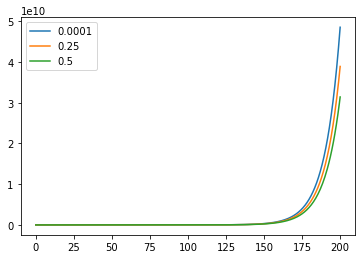

In [23]:
plt.plot(time_list_r1, population_list_r1, label="0.0001")
plt.plot(time_list_r2, population_list_r2, label="0.25")
plt.plot(time_list_r3, population_list_r3, label="0.5")
plt.legend()
plt.show()

# Exercise 1, d)

#### Smaller step size = more time to process as there will be more calculations.
#### Smaller step size = more precise results.
#### ...could lead to overflow and memory issues as the numbers become more precise (more decimals) and more data needs to be stored.

#### NOTE: ran a smaller simulation length and plotted them below. I feel this shows how the smaller step size is precise, as the difference for the end results is around 10/15.

Step Size:  0.0001
Sim Range:  100001
EXECUTION TIME: 0.05396914482116699
Step Size:  0.25
Sim Range:  41
EXECUTION TIME: 0.0
Step Size:  0.5
Sim Range:  21
EXECUTION TIME: 0.0


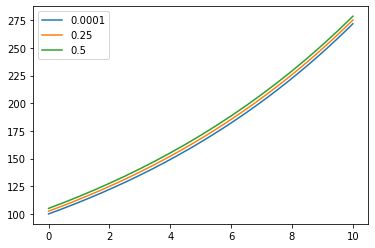

In [24]:
simLength = 10
time_list_r1, growth_list_r1, population_list_r1 = simFinDiff(simLength, initPop, growthRate, rate1)
time_list_r2, growth_list_r2, population_list_r2 = simFinDiff(simLength, initPop, growthRate, rate2)
time_list_r3, growth_list_r3, population_list_r3 = simFinDiff(simLength, initPop, growthRate, rate3)

plt.plot(time_list_r1, population_list_r1, label="0.0001")
plt.plot(time_list_r2, population_list_r2, label="0.25")
plt.plot(time_list_r3, population_list_r3, label="0.5")
plt.legend()
plt.show()

# Exercise 2, a)

In [25]:
def simAnalytical(stepSize, growthRate, initPop, simLength):
    time_array, population_array, actual_population_array, growth_array = [], [], [], []
    start_time = time.time()
    numIter = int(simLength / stepSize)+1

    print("Step Size: ", stepSize)
    print("Number of Iterations: ", numIter)
    
    dT = stepSize 
    P = initPop
    population = initPop
    
    for i in range(numIter):
        
        growth = growthRate * population
        population = population + growth * dT
        t = i * dT
        
        time_array.append(t)
        growth_array.append(growth)
        population_array.append(population)
        
        #analytical - actual population. #TODO: make function...
        value = P*math.exp(growthRate * stepSize)
        actual_population_array.append(value)
        
        P = value
        
    end_time = time.time()
    print("EXECUTION TIME: {}".format(end_time-start_time))
    
    return time_array, population_array, actual_population_array, growth_array

initPop = 15000
growthRate = 0.02 # 10%
simLength = 20

stepSize = 0.25

time_list, population_list, actual_population_list, growth_list = simAnalytical(stepSize, growthRate, initPop, simLength)

Step Size:  0.25
Number of Iterations:  81
EXECUTION TIME: 0.0


# Exercise 2, b)

81
81
81


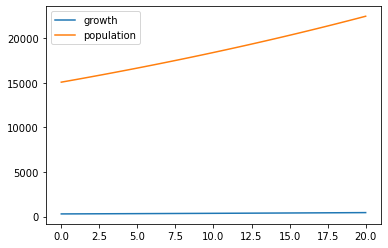

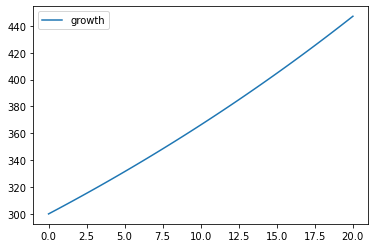

In [26]:
print(len(growth_list))
print(len(population_list))
print(len(time_list))
plt.plot(time_list, growth_list, label="growth")
plt.plot(time_list, population_list, label="population")
plt.legend()
plt.show()

plt.plot(time_list, growth_list, label="growth")
plt.legend()
plt.show()

# Exercise 2, c) & d)
## c) Population at 20 years:  22466.853910
## d) 
###### 	t(h)	growth	population
###### 	0.00	300.000000	15075.000000
###### 	0.25	301.500000	15150.375000
###### 	0.50	303.007500	15226.126875
###### 	0.75	304.522537	15302.257509

In [27]:
animalPopTable = pd.DataFrame()
animalPopTable.insert(loc=0, column="t(h)", value=time_list)
animalPopTable.insert(loc=1, column="growth", value=growth_list)
animalPopTable.insert(loc=2, column="population", value=population_list)
animalPopTable

,t(h),growth,population
0,0.00,300.000000000000000,15075.000000000000000
1,0.25,301.500000000000000,15150.375000000000000
2,0.50,303.007499999999993,15226.126874999999927
3,0.75,304.522537499999999,15302.257509375000154
4,1.00,306.045150187499985,15378.768796921875037
...,...,...,...
76,19.00,438.270206286128371,22023.077865877952718
77,19.25,440.461557317559084,22133.193255207341281
78,19.50,442.663865104146851,22243.859221483377041
79,19.75,444.877184429667523,22355.078517590794945


# Exercise 3, a)

In [29]:
initCarbon = 20
    # Years #
stepSize = 0.25
timeLength = 25000

numIterations = int(timeLength / stepSize) + 1
Q = initCarbon

carbonQ_array, time_array = [],[]

for i in range(numIterations):
    Q = Q*math.exp(-0.000120968)
    carbonQ_array.append(Q)
    time_array.append(i*stepSize)
    
carbonQTable = pd.DataFrame()
carbonQTable.insert(loc=0, column="t(h)", value=time_array)
carbonQTable.insert(loc=1, column="carbonQ", value=carbonQ_array)
carbonQTable.iloc[100000]
#print(carbonQ_array[100000])
carbonQTable

,t(h),carbonQ
0,0.00,19.997580786326669
1,0.25,19.995161865283077
2,0.50,19.992743236833828
3,0.75,19.990324900943531
4,1.00,19.987906857576796
...,...,...
99996,24999.00,0.000111587131652
99997,24999.25,0.000111573633996
99998,24999.50,0.000111560137973
99999,24999.75,0.000111546643582


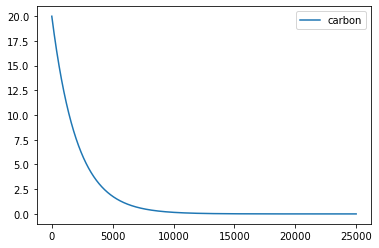

In [30]:
plt.plot(time_array, carbonQ_array, label="carbon")
plt.legend()
plt.show()

## Lab Feedback: 
### Personally due having a module (Commerical Development Practice) be 9-5 Mon-Fri last week (25th-29th, Jan), I didn't get the chance to read the lectures beforehand, meaning I only completed 1 task this week. However, I will be able to catch up for next week's lab session and l could probably complete all the supplementary exercises.

#### Cheers, Shaun.